In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
from scipy import stats
import os

In [12]:
path = 'Data/SpinningRodOrientation/'
filenames = [f for f in os.listdir(path) if f.endswith('.mat')]
Ls = [int(f.split('_')[0][1:]) for f in filenames]
Ls, filenames = map(list, zip(*sorted(zip(Ls, filenames))))
print(filenames)

data = list(map(lambda x: loadmat(x)['AngSpeed_OrientTIP'], [path + f for f in filenames]))

for d in data: 
    d[:, 1] = (d[:, 1]-90)/180*np.pi

uni_Ls = np.unique(Ls)
agg_data = []
for L in uni_Ls: 
    single_length = [d for (d, l) in zip(data, Ls) if l == L]
    agg_data.append(single_length)
Ls = uni_Ls 
data = agg_data 

['N3_1_50_01_02Bright_sortedSpeed_OrientTIP.mat', 'N3_1_50_23_05Bead_Bright_Particles_trajectories_sortedSpeed_OrientTIP.mat', 'N3_1_50_23_05Bead_Bright_Particles_trajectories_sortedSpeed_OrientTIP2.mat', 'N3_2_50_01_02Bright_sortedSpeed_OrientTIP.mat', 'N3_2_50_01_02Bright_sortedSpeed_OrientTIP2.mat', 'N3_2_50_22_05Bead_Bright_Particles_trajectories_sortedSpeed_OrientTIP.mat', 'N3_2_50_22_05Bead_Bright_Particles_trajectories_sortedSpeed_OrientTIP2.mat', 'N3_3_50_22_05Bead_Bright_Particles_trajectories_sortedSpeed_OrientTIP.mat', 'N5_1_50_01_02Bright_sortedSpeed_OrientTIP.mat', 'N5_1_50_23_05Bead_Bright_Particles_trajectories_sortedSpeed_OrientTIP.mat', 'N5_1_50_23_05Bead_Bright_Particles_trajectories_sortedSpeed_OrientTIP2.mat', 'N5_2_50_01_02Bright_sortedSpeed_OrientTIP.mat', 'N5_2_50_01_02Bright_sortedSpeed_OrientTIP2.mat', 'N5_2_50_Top105mA_22_05Bead_Bright_Particles_trajectories_sortedSpeed_OrientTIP.mat', 'N5_4_50_01_02Bright_sortedSpeed_OrientTIP.mat', 'N7_1_50_01_02Bright_sorte

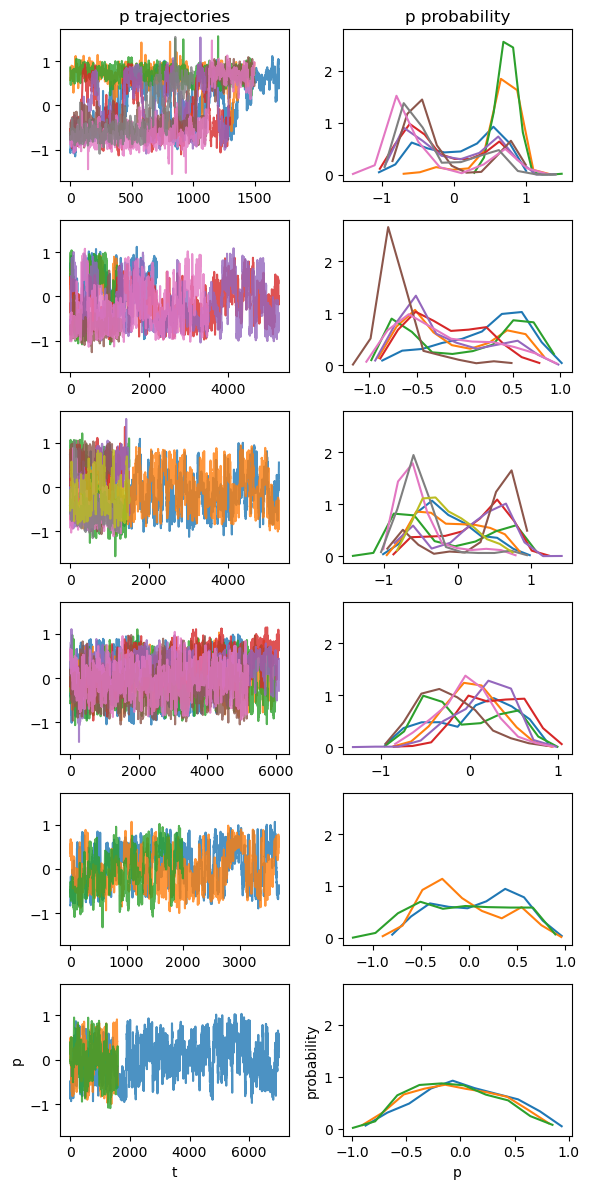

In [8]:
fig, axes = plt.subplots(len(Ls), 2, sharey='col', figsize=(6, 2*len(Ls)))
for (i, (L, d)) in enumerate(zip(Ls, data)): 
    for (j, traj) in enumerate(d): 
        axes[i, 0].plot(traj[:, 1], alpha=0.8, c=plt.cm.tab10(j))
        counts, bins = np.histogram(traj[:, 1], density=True)
        mids = [(x+y)/2 for (x, y) in zip(bins[:-1], bins[1:])]
        axes[i, 1].plot(mids, counts, '-', c=plt.cm.tab10(j))
axes[0, 0].set_title('p trajectories')
axes[0, 1].set_title('p probability')

axes[-1, 0].set_xlabel('t')
axes[-1, 1].set_xlabel('p')

axes[-1, 0].set_ylabel('p')
axes[-1, 1].set_ylabel('probability')

plt.tight_layout()
plt.show() 

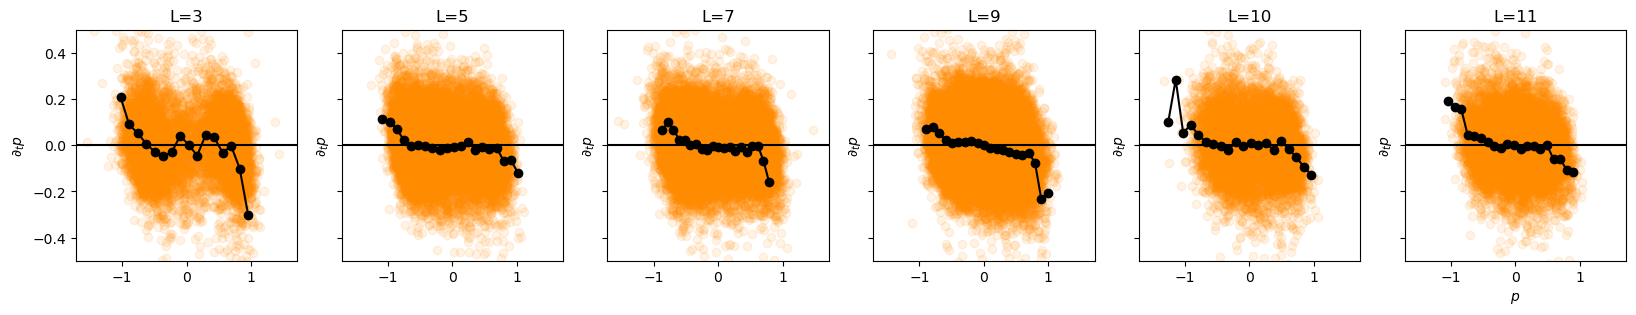

In [9]:
fig, axes = plt.subplots(1, len(Ls), sharex=True, sharey=True, figsize=(20, 3))
for (i, (L, d)) in enumerate(zip(Ls, data)): 
    ps = [] 
    dps = [] 
    for traj in d: 
        p = traj[:, 1]
        axes[i].plot(p[:-1], p[1:]-p[:-1], 'o', alpha=0.1, c='darkorange')
        ps.extend(p[:-1])
        dps.extend(p[1:]-p[:-1])
    val, bins, _ = stats.binned_statistic(p[:-1], p[1:]-p[:-1], bins=20)
    mids = [(x+y)/2 for (x, y) in zip(bins[:-1], bins[1:])]
    axes[i].plot(mids, val, 'o-', c='k')
    axes[i].axhline(y=0, c='k')
    axes[i].set_title('L={}'.format(L))
    axes[i].set_ylabel(r'$\partial_t p$')
axes[0].set_ylim([-0.5, 0.5])
axes[-1].set_xlabel(r'$p$')
plt.show() 

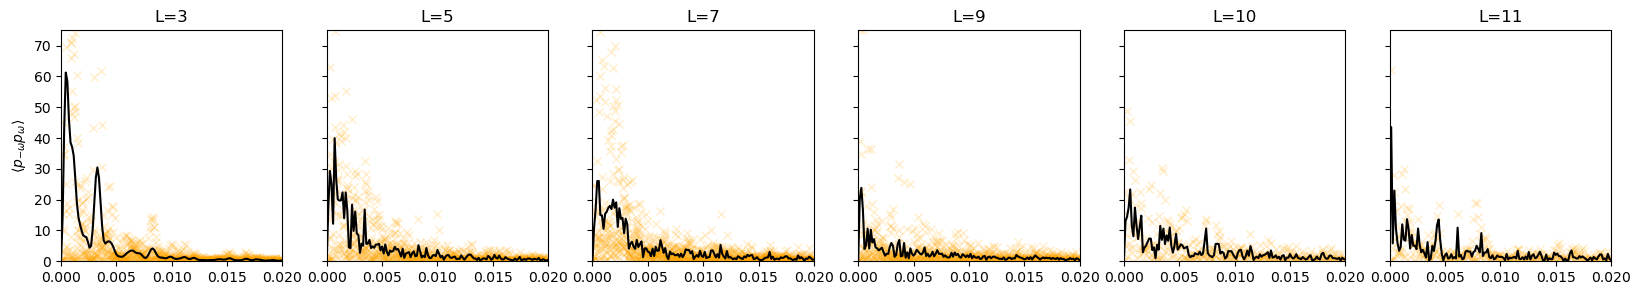

In [10]:
max_length = max([max([len(traj[:, 1]) for traj in d]) for d in data])
w = np.fft.rfftfreq(max_length)

fig, axes = plt.subplots(1, len(Ls), sharex=True, sharey=True, figsize=(20, 3))
for (i, (L, d)) in enumerate(zip(Ls, data)):
    S = np.zeros(int(np.ceil(max_length/2)))
    tot_length = 0 
    for traj in d: 
        p = traj[:, 1] - np.mean(traj[:, 1])
        tot_length += len(p)
        p_pad = np.pad(p, (0, max_length - len(p)), mode='constant')
        pw = np.fft.rfft(p_pad)
        axes[i].plot(w, np.abs(pw)**2/len(p), 'x', alpha=0.2, c='orange')
        S += np.abs(pw)**2
    axes[i].plot(w, S/tot_length, c='k')
    axes[i].set_title('L={}'.format(L))
axes[i].set_xlim([0, 0.02])
axes[0].set_ylabel(r'$\langle p_{-\omega} p_{\omega} \rangle$')
axes[0].set_ylim([0, 75])
plt.show() 